In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Load the embeddings and labels
embeddings = np.load('data_points.npy')
labels = np.load('labels.npy')

print('Embeddings shape:', embeddings.shape)  # Should be (3188, 2000, 10)
print('Labels shape:', labels.shape)  # Should be (3188,)

# Flatten the embeddings
embeddings_flattened = embeddings.reshape(embeddings.shape[0], -1)
print('Flattened Embeddings shape:', embeddings_flattened.shape)  # Should be (3188, 20000)

# Define the Autoencoder architecture
class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, encoding_dim),
            nn.ReLU(True)
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, input_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

input_dim = embeddings_flattened.shape[1]
encoding_dim = 256  # Adjust based on your needs

autoencoder = Autoencoder(input_dim, encoding_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# Prepare data for training
embedding_tensors = torch.tensor(embeddings_flattened, dtype=torch.float32)
dataset = TensorDataset(embedding_tensors, embedding_tensors)
dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

# Train the Autoencoder
num_epochs = 50
for epoch in range(num_epochs):
    for data in dataloader:
        inputs, _ = data
        outputs = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Calculate reconstruction error
autoencoder.eval()
with torch.no_grad():
    reconstructions = autoencoder(embedding_tensors)
    reconstruction_errors = torch.mean((embedding_tensors - reconstructions) ** 2, dim=1).numpy()

# Determine anomaly threshold
threshold = np.percentile(reconstruction_errors, 95)  # Example threshold at the 95th percentile
anomalies = reconstruction_errors > threshold

# Visualize reconstruction errors
plt.hist(reconstruction_errors, bins=50)
plt.xlabel('Reconstruction error')
plt.ylabel('Number of samples')
plt.show()

# Evaluate performance
predicted_anomalies = anomalies.astype(int)

print(classification_report(labels, predicted_anomalies))
print(confusion_matrix(labels, predicted_anomalies))
print("ROC AUC Score:", roc_auc_score(labels, reconstruction_errors))


Embeddings shape: (4746, 2000, 10)
Labels shape: (4746,)
PCA Embeddings shape: (4746, 500)
Epoch [1/100], Loss: 5.4372
Epoch [2/100], Loss: 5.1748
Epoch [3/100], Loss: 5.4740
Epoch [4/100], Loss: 5.3610
Epoch [5/100], Loss: 5.2938
Epoch [6/100], Loss: 5.3177
Epoch [7/100], Loss: 5.2404
Epoch [8/100], Loss: 5.3402
Epoch [9/100], Loss: 5.1405
Epoch [10/100], Loss: 5.2112
Epoch [11/100], Loss: 5.1607
Epoch [12/100], Loss: 5.2077
Epoch [13/100], Loss: 5.2287
Epoch [14/100], Loss: 5.0986
Epoch [15/100], Loss: 5.1442
Epoch [16/100], Loss: 5.0520
Epoch [17/100], Loss: 5.1864
Epoch [18/100], Loss: 5.1103
Epoch [19/100], Loss: 5.2800
Epoch [20/100], Loss: 5.0322
Epoch [21/100], Loss: 5.0374
Epoch [22/100], Loss: 5.0279
Epoch [23/100], Loss: 5.1008
Epoch [24/100], Loss: 5.1317
Epoch [25/100], Loss: 5.1453
Epoch [26/100], Loss: 5.1319
Epoch [27/100], Loss: 5.0859
Epoch [28/100], Loss: 4.9575
Epoch [29/100], Loss: 5.0338
Epoch [30/100], Loss: 5.0446
Epoch [31/100], Loss: 5.1075
Epoch [32/100], Los

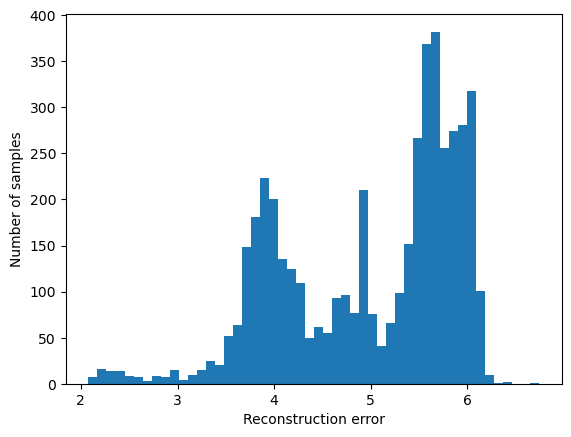

              precision    recall  f1-score   support

         0.0       1.00      0.85      0.92      4746
         1.0       0.00      0.00      0.00         0

    accuracy                           0.85      4746
   macro avg       0.50      0.42      0.46      4746
weighted avg       1.00      0.85      0.92      4746

[[4034  712]
 [   0    0]]


/home/binghui/anaconda3/envs/backdoor-attack/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/binghui/anaconda3/envs/backdoor-attack/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/binghui/anaconda3/envs/backdoor-attack/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [6]:
### PCA
import numpy as np
from sklearn.decomposition import PCA
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Load the embeddings and labels
embeddings = np.load('data_points.npy')
labels = np.load('labels.npy')

print('Embeddings shape:', embeddings.shape)  # Should be (3188, 2000, 10)
print('Labels shape:', labels.shape)  # Should be (3188,)

# Flatten the embeddings
embeddings_flattened = embeddings.reshape(embeddings.shape[0], -1)

# Apply PCA
pca = PCA(n_components=500)  # Reduce to 500 dimensions, adjust based on your needs
embeddings_pca = pca.fit_transform(embeddings_flattened)

print('PCA Embeddings shape:', embeddings_pca.shape)  # Should be (3188, 500)

# Define the Autoencoder architecture
class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, encoding_dim),
            nn.ReLU(True)
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, input_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

input_dim = embeddings_pca.shape[1]
encoding_dim = 128  # Adjust based on your needs

autoencoder = Autoencoder(input_dim, encoding_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# Prepare data for training
embedding_tensors = torch.tensor(embeddings_pca, dtype=torch.float32)
dataset = TensorDataset(embedding_tensors, embedding_tensors)
dataloader = DataLoader(dataset, batch_size=256, shuffle=True)

# Train the Autoencoder
num_epochs = 100
for epoch in range(num_epochs):
    for data in dataloader:
        inputs, _ = data
        outputs = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Calculate reconstruction error
autoencoder.eval()
with torch.no_grad():
    reconstructions = autoencoder(embedding_tensors)
    reconstruction_errors = torch.mean((embedding_tensors - reconstructions) ** 2, dim=1).numpy()

# Determine anomaly threshold
threshold = np.percentile(reconstruction_errors, 85)  # Example threshold at the 95th percentile
anomalies = reconstruction_errors > threshold

# Visualize reconstruction errors
plt.hist(reconstruction_errors, bins=50)
plt.xlabel('Reconstruction error')
plt.ylabel('Number of samples')
plt.show()

# Evaluate performance
predicted_anomalies = anomalies.astype(int)

print(classification_report(labels, predicted_anomalies))
print(confusion_matrix(labels, predicted_anomalies))
print("ROC AUC Score:", roc_auc_score(labels, reconstruction_errors))




Training Embeddings shape: (4746, 2000, 10)
Training Labels shape: (4746,)
Flattened Training Embeddings shape: (4746, 20000)
Test Embeddings shape: (10246, 2000, 10)
Test Labels shape: (10246,)
Flattened Test Embeddings shape: (10246, 20000)
Epoch [1/50], Loss: 6.7292
Epoch [2/50], Loss: 6.8327
Epoch [3/50], Loss: 6.9720
Epoch [4/50], Loss: 6.7783
Epoch [5/50], Loss: 6.9275
Epoch [6/50], Loss: 7.1058
Epoch [7/50], Loss: 7.1123
Epoch [8/50], Loss: 7.1880
Epoch [9/50], Loss: 7.1560
Epoch [10/50], Loss: 7.0989
Epoch [11/50], Loss: 7.2934
Epoch [12/50], Loss: 7.1723
Epoch [13/50], Loss: 6.9133
Epoch [14/50], Loss: 6.9798
Epoch [15/50], Loss: 6.9865
Epoch [16/50], Loss: 6.9311
Epoch [17/50], Loss: 7.0446
Epoch [18/50], Loss: 7.0234
Epoch [19/50], Loss: 6.9320
Epoch [20/50], Loss: 7.0418
Epoch [21/50], Loss: 7.3767
Epoch [22/50], Loss: 6.7105
Epoch [23/50], Loss: 7.0320
Epoch [24/50], Loss: 6.9979
Epoch [25/50], Loss: 7.1909
Epoch [26/50], Loss: 7.0758
Epoch [27/50], Loss: 6.7352
Epoch [28/

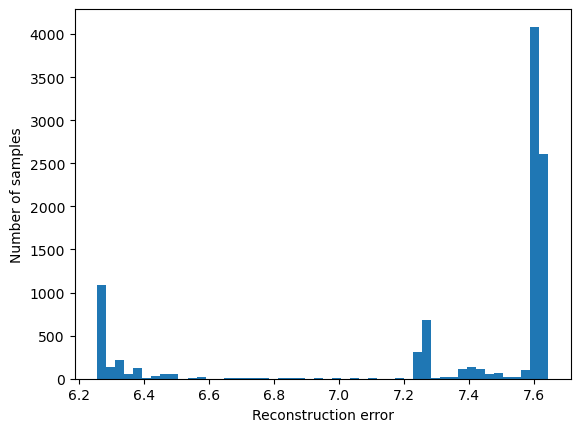

              precision    recall  f1-score   support

         0.0       1.00      0.69      0.81      4715
         1.0       0.79      1.00      0.88      5531

    accuracy                           0.86     10246
   macro avg       0.89      0.84      0.85     10246
weighted avg       0.88      0.86      0.85     10246

[[3245 1470]
 [  13 5518]]
ROC AUC Score: 0.9569682535513226


In [24]:
### Sparse with training 
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Load the training embeddings and labels
embeddings_train = np.load('data_points.npy')
labels_train = np.load('labels.npy')

print('Training Embeddings shape:', embeddings_train.shape)  # Should be (3188, 2000, 10)
print('Training Labels shape:', labels_train.shape)  # Should be (3188,)

# Flatten the training embeddings
embeddings_train_flattened = embeddings_train.reshape(embeddings_train.shape[0], -1)
print('Flattened Training Embeddings shape:', embeddings_train_flattened.shape)  # Should be (3188, 20000)

# Load the test embeddings and labels
embeddings_test = np.load('data_points_test.npy')
labels_test = np.load('labels_test.npy')

print('Test Embeddings shape:', embeddings_test.shape)  # Should be (e.g., 1000, 2000, 10)
print('Test Labels shape:', labels_test.shape)  # Should be (e.g., 1000,)

# Flatten the test embeddings
embeddings_test_flattened = embeddings_test.reshape(embeddings_test.shape[0], -1)
print('Flattened Test Embeddings shape:', embeddings_test_flattened.shape)  # Should be (e.g., 1000, 20000)

# Define the Sparse Autoencoder architecture
class SparseAutoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(SparseAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(True),
            nn.Linear(256, encoding_dim),
            nn.ReLU(True)
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 256),
            nn.ReLU(True),
            nn.Linear(256, input_dim),
            nn.Sigmoid()
        )
        

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

    def loss_function(self, recon_x, x, sparsity_target=0.05, sparsity_weight=1e-3):
        mse_loss = nn.MSELoss()(recon_x, x)
        # L1 regularization
        sparsity_loss = torch.mean(torch.abs(self.encoder[0].weight))
        return mse_loss + sparsity_weight * sparsity_loss




input_dim = embeddings_train_flattened.shape[1]
encoding_dim = 128  # Adjust based on your needs

sparse_autoencoder = SparseAutoencoder(input_dim, encoding_dim)
optimizer = optim.Adam(sparse_autoencoder.parameters(), lr=0.005)


# Prepare data for training
embedding_train_tensors = torch.tensor(embeddings_train_flattened, dtype=torch.float32)
dataset_train = TensorDataset(embedding_train_tensors, embedding_train_tensors)
dataloader_train = DataLoader(dataset_train, batch_size=128, shuffle=True)



# Train the Sparse Autoencoder
num_epochs = 50
for epoch in range(num_epochs):
    # print("Epoch", epoch)
    for data in dataloader_train:
        inputs, _ = data
        outputs = sparse_autoencoder(inputs)
        loss = sparse_autoencoder.loss_function(outputs, inputs)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')



# Calculate reconstruction error on the test set
embedding_test_tensors = torch.tensor(embeddings_test_flattened, dtype=torch.float32)

# Calculate reconstruction error
sparse_autoencoder.eval()
with torch.no_grad():
    reconstructions_test = sparse_autoencoder(embedding_test_tensors)
    reconstruction_errors_test = torch.mean((embedding_test_tensors - reconstructions_test) ** 2, dim=1).numpy()

# Determine anomaly threshold based on training reconstruction errors
sparse_autoencoder.eval()
with torch.no_grad():
    reconstructions_train = sparse_autoencoder(embedding_train_tensors)
    reconstruction_errors_train = torch.mean((embedding_train_tensors - reconstructions_train) ** 2, dim=1).numpy()

threshold = np.percentile(reconstruction_errors_train, 95)  # Example threshold at the 95th percentile
anomalies_test = reconstruction_errors_test > threshold

# Visualize reconstruction errors for the test set
plt.hist(reconstruction_errors_test, bins=50)
plt.xlabel('Reconstruction error')
plt.ylabel('Number of samples')
plt.show()

# Evaluate performance on the test set
predicted_anomalies_test = anomalies_test.astype(int)

print(classification_report(labels_test, predicted_anomalies_test))
print(confusion_matrix(labels_test, predicted_anomalies_test))
print("ROC AUC Score:", roc_auc_score(labels_test, reconstruction_errors_test))

Training Embeddings shape: (4746, 2000, 10)
Training Labels shape: (4746,)
Flattened Training Embeddings shape: (4746, 20000)
Test Embeddings shape: (2580, 2000, 10)
Test Labels shape: (2580,)
Flattened Test Embeddings shape: (2580, 20000)


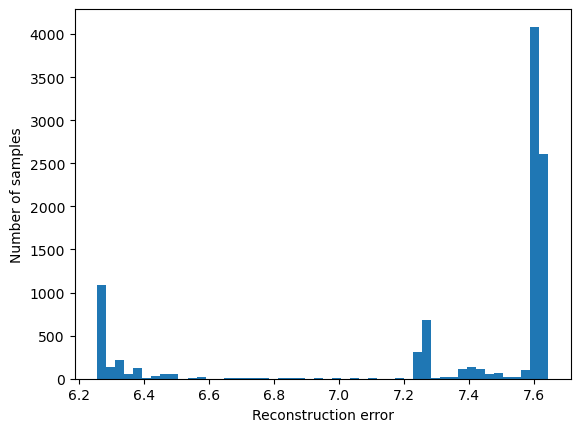

ValueError: Found input variables with inconsistent numbers of samples: [2580, 10246]

In [31]:
# Load the training embeddings and labels
embeddings_train = np.load('data_points.npy')
labels_train = np.load('labels.npy')

print('Training Embeddings shape:', embeddings_train.shape)  # Should be (3188, 2000, 10)
print('Training Labels shape:', labels_train.shape)  # Should be (3188,)

# Flatten the training embeddings
embeddings_train_flattened = embeddings_train.reshape(embeddings_train.shape[0], -1)
print('Flattened Training Embeddings shape:', embeddings_train_flattened.shape)  # Should be (3188, 20000)

# Load the test embeddings and labels
embeddings_test = np.load('data_points_test_2.npy')
labels_test = np.load('labels_test_2.npy')

print('Test Embeddings shape:', embeddings_test.shape)  # Should be (e.g., 1000, 2000, 10)
print('Test Labels shape:', labels_test.shape)  # Should be (e.g., 1000,)

# Flatten the test embeddings
embeddings_test_flattened = embeddings_test.reshape(embeddings_test.shape[0], -1)
print('Flattened Test Embeddings shape:', embeddings_test_flattened.shape)  # Should be (e.g., 1000, 20000)




# Calculate reconstruction error
sparse_autoencoder.eval()
with torch.no_grad():
    reconstructions_test = sparse_autoencoder(embedding_test_tensors)
    reconstruction_errors_test = torch.mean((embedding_test_tensors - reconstructions_test) ** 2, dim=1).numpy()

# Determine anomaly threshold based on training reconstruction errors
sparse_autoencoder.eval()
with torch.no_grad():
    reconstructions_train = sparse_autoencoder(embedding_train_tensors)
    reconstruction_errors_train = torch.mean((embedding_train_tensors - reconstructions_train) ** 2, dim=1).numpy()

threshold = np.percentile(reconstruction_errors_train, 95)  # Example threshold at the 95th percentile
anomalies_test = reconstruction_errors_test > threshold

# Visualize reconstruction errors for the test set
plt.hist(reconstruction_errors_test, bins=50)
plt.xlabel('Reconstruction error')
plt.ylabel('Number of samples')
plt.show()

# Evaluate performance on the test set
predicted_anomalies_test = anomalies_test.astype(int)

print(classification_report(labels_test, predicted_anomalies_test))
print(confusion_matrix(labels_test, predicted_anomalies_test))
print("ROC AUC Score:", roc_auc_score(labels_test, reconstruction_errors_test))

Training Embeddings shape: (4746, 2000, 10)
Training Labels shape: (4746,)
Flattened Training Embeddings shape: (4746, 20000)
Test Embeddings shape: (10246, 2000, 10)
Test Labels shape: (10246,)
Flattened Test Embeddings shape: (10246, 20000)
Epoch [1/100], Loss: 7.1251
Epoch [2/100], Loss: 6.7947
Epoch [3/100], Loss: 6.9272
Epoch [4/100], Loss: 6.9163
Epoch [5/100], Loss: 7.2875
Epoch [6/100], Loss: 6.9484
Epoch [7/100], Loss: 7.1797
Epoch [8/100], Loss: 7.0748
Epoch [9/100], Loss: 7.1918
Epoch [10/100], Loss: 6.9199
Epoch [11/100], Loss: 6.9912
Epoch [12/100], Loss: 7.1531
Epoch [13/100], Loss: 6.9949
Epoch [14/100], Loss: 7.0560
Epoch [15/100], Loss: 6.9071
Epoch [16/100], Loss: 7.0877
Epoch [17/100], Loss: 7.1263
Epoch [18/100], Loss: 7.0428
Epoch [19/100], Loss: 6.8053
Epoch [20/100], Loss: 6.8028
Epoch [21/100], Loss: 6.7871
Epoch [22/100], Loss: 6.7966
Epoch [23/100], Loss: 6.8386
Epoch [24/100], Loss: 7.0238
Epoch [25/100], Loss: 6.9541
Epoch [26/100], Loss: 6.5457
Epoch [27/10

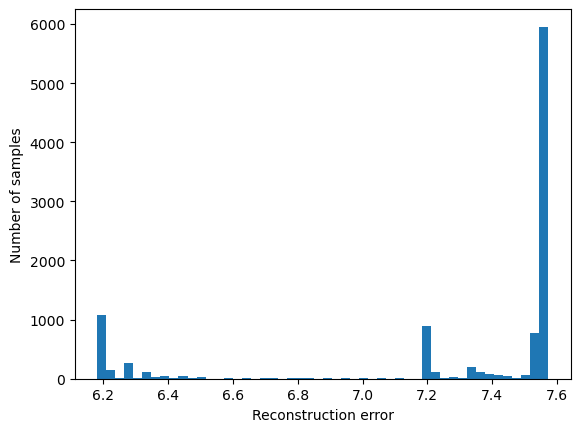

              precision    recall  f1-score   support

         0.0       1.00      0.66      0.79      4715
         1.0       0.77      1.00      0.87      5531

    accuracy                           0.84     10246
   macro avg       0.88      0.83      0.83     10246
weighted avg       0.88      0.84      0.83     10246

[[3090 1625]
 [  12 5519]]
ROC AUC Score: 0.964249186068382


In [8]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Load the training embeddings and labels
embeddings_train = np.load('data_points.npy')
labels_train = np.load('labels.npy')

print('Training Embeddings shape:', embeddings_train.shape)  # Should be (3188, 2000, 10)
print('Training Labels shape:', labels_train.shape)  # Should be (3188,)

# Flatten the training embeddings
embeddings_train_flattened = embeddings_train.reshape(embeddings_train.shape[0], -1)
print('Flattened Training Embeddings shape:', embeddings_train_flattened.shape)  # Should be (3188, 20000)

# Load the test embeddings and labels
embeddings_test = np.load('data_points_test.npy')
labels_test = np.load('labels_test.npy')

print('Test Embeddings shape:', embeddings_test.shape)  # Should be (e.g., 1000, 2000, 10)
print('Test Labels shape:', labels_test.shape)  # Should be (e.g., 1000,)

# Flatten the test embeddings
embeddings_test_flattened = embeddings_test.reshape(embeddings_test.shape[0], -1)
print('Flattened Test Embeddings shape:', embeddings_test_flattened.shape)  # Should be (e.g., 1000, 20000)

# Define the Autoencoder architecture
class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, encoding_dim),
            nn.ReLU(True)
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, input_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

input_dim = embeddings_train_flattened.shape[1]
encoding_dim = 256  # Adjust based on your needs

autoencoder = Autoencoder(input_dim, encoding_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# Prepare data for training
embedding_train_tensors = torch.tensor(embeddings_train_flattened, dtype=torch.float32)
dataset_train = TensorDataset(embedding_train_tensors, embedding_train_tensors)
dataloader_train = DataLoader(dataset_train, batch_size=128, shuffle=True)

# Train the Autoencoder
num_epochs = 100
for epoch in range(num_epochs):
    for data in dataloader_train:
        inputs, _ = data
        outputs = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Calculate reconstruction error on the test set
embedding_test_tensors = torch.tensor(embeddings_test_flattened, dtype=torch.float32)
autoencoder.eval()
with torch.no_grad():
    reconstructions_test = autoencoder(embedding_test_tensors)
    reconstruction_errors_test = torch.mean((embedding_test_tensors - reconstructions_test) ** 2, dim=1).numpy()

# Determine anomaly threshold based on training reconstruction errors
autoencoder.eval()
with torch.no_grad():
    reconstructions_train = autoencoder(embedding_train_tensors)
    reconstruction_errors_train = torch.mean((embedding_train_tensors - reconstructions_train) ** 2, dim=1).numpy()

threshold = np.percentile(reconstruction_errors_train, 95)  # Example threshold at the 95th percentile
anomalies_test = reconstruction_errors_test > threshold

# Visualize reconstruction errors for the test set
plt.hist(reconstruction_errors_test, bins=50)
plt.xlabel('Reconstruction error')
plt.ylabel('Number of samples')
plt.show()

# Evaluate performance on the test set
predicted_anomalies_test = anomalies_test.astype(int)

print(classification_report(labels_test, predicted_anomalies_test))
print(confusion_matrix(labels_test, predicted_anomalies_test))
print("ROC AUC Score:", roc_auc_score(labels_test, reconstruction_errors_test))


Test Embeddings shape: (10246, 2000, 10)
Test Labels shape: (10246,)
Flattened Test Embeddings shape: (10246, 20000)


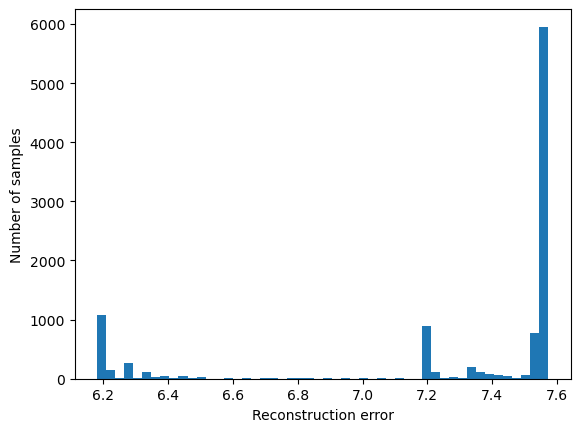

              precision    recall  f1-score   support

         0.0       1.00      0.66      0.79      4715
         1.0       0.77      1.00      0.87      5531

    accuracy                           0.84     10246
   macro avg       0.88      0.83      0.83     10246
weighted avg       0.88      0.84      0.83     10246

[[3090 1625]
 [  12 5519]]
ROC AUC Score: 0.964249186068382


In [32]:
# Load the test embeddings and labels
embeddings_test = np.load('data_points_test.npy')
labels_test = np.load('labels_test.npy')

print('Test Embeddings shape:', embeddings_test.shape)  # Should be (e.g., 1000, 2000, 10)
print('Test Labels shape:', labels_test.shape)  # Should be (e.g., 1000,)

# Flatten the test embeddings
embeddings_test_flattened = embeddings_test.reshape(embeddings_test.shape[0], -1)
print('Flattened Test Embeddings shape:', embeddings_test_flattened.shape)  # Should be (e.g., 1000, 20000)

# Calculate reconstruction error on the test set
embedding_test_tensors = torch.tensor(embeddings_test_flattened, dtype=torch.float32)
autoencoder.eval()
with torch.no_grad():
    reconstructions_test = autoencoder(embedding_test_tensors)
    reconstruction_errors_test = torch.mean((embedding_test_tensors - reconstructions_test) ** 2, dim=1).numpy()

# Determine anomaly threshold based on training reconstruction errors
autoencoder.eval()
with torch.no_grad():
    reconstructions_train = autoencoder(embedding_train_tensors)
    reconstruction_errors_train = torch.mean((embedding_train_tensors - reconstructions_train) ** 2, dim=1).numpy()


threshold = np.percentile(reconstruction_errors_train, 95)  # Example threshold at the 95th percentile
anomalies_test = reconstruction_errors_test > threshold

# Visualize reconstruction errors for the test set
plt.hist(reconstruction_errors_test, bins=50)
plt.xlabel('Reconstruction error')
plt.ylabel('Number of samples')
plt.show()

# Evaluate performance on the test set
predicted_anomalies_test = anomalies_test.astype(int)

print(classification_report(labels_test, predicted_anomalies_test))
print(confusion_matrix(labels_test, predicted_anomalies_test))
print("ROC AUC Score:", roc_auc_score(labels_test, reconstruction_errors_test))

Embeddings shape: (1720, 2000, 10)
Labels shape: (1720,)
Flattened Embeddings shape: (1720, 20000)
Epoch [1/50], Loss: 7.1895
Epoch [2/50], Loss: 7.1092
Epoch [3/50], Loss: 7.1695
Epoch [4/50], Loss: 7.0935
Epoch [5/50], Loss: 7.1858
Epoch [6/50], Loss: 7.2100
Epoch [7/50], Loss: 7.1648
Epoch [8/50], Loss: 7.1529
Epoch [9/50], Loss: 7.1803
Epoch [10/50], Loss: 7.2377
Epoch [11/50], Loss: 7.1763
Epoch [12/50], Loss: 7.1545
Epoch [13/50], Loss: 7.1469
Epoch [14/50], Loss: 7.1830
Epoch [15/50], Loss: 7.1477
Epoch [16/50], Loss: 7.1971
Epoch [17/50], Loss: 7.2056
Epoch [18/50], Loss: 7.1935
Epoch [19/50], Loss: 7.2587
Epoch [20/50], Loss: 7.2256
Epoch [21/50], Loss: 7.2188
Epoch [22/50], Loss: 7.2096
Epoch [23/50], Loss: 7.1842
Epoch [24/50], Loss: 7.2219
Epoch [25/50], Loss: 7.2138
Epoch [26/50], Loss: 7.2369
Epoch [27/50], Loss: 7.2551
Epoch [28/50], Loss: 7.1880
Epoch [29/50], Loss: 7.1468
Epoch [30/50], Loss: 7.2026
Epoch [31/50], Loss: 7.2127
Epoch [32/50], Loss: 7.2095
Epoch [33/50],

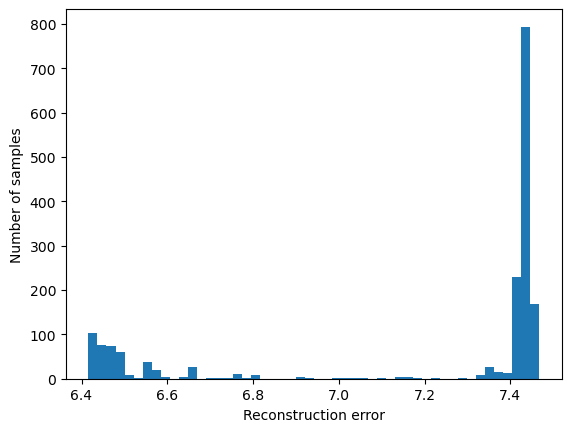

              precision    recall  f1-score   support

         0.0       0.53      1.00      0.69       860
         1.0       0.99      0.10      0.18       860

    accuracy                           0.55      1720
   macro avg       0.76      0.55      0.43      1720
weighted avg       0.76      0.55      0.43      1720

[[859   1]
 [775  85]]
ROC AUC Score: 0.9501811790156843


In [2]:
### Sparse
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Load the embeddings and labels
embeddings = np.load('data_points.npy')
labels = np.load('labels.npy')

print('Embeddings shape:', embeddings.shape)  # Should be (3188, 2000, 10)
print('Labels shape:', labels.shape)  # Should be (3188,)

# Flatten the embeddings
embeddings_flattened = embeddings.reshape(embeddings.shape[0], -1)
print('Flattened Embeddings shape:', embeddings_flattened.shape)  # Should be (3188, 20000)

# Define the Sparse Autoencoder architecture
class SparseAutoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(SparseAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(True),
            nn.Linear(256, encoding_dim),
            nn.ReLU(True)
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 256),
            nn.ReLU(True),
            nn.Linear(256, input_dim),
            nn.Sigmoid()
        )
        

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

    def loss_function(self, recon_x, x, sparsity_target=0.05, sparsity_weight=1e-3):
        mse_loss = nn.MSELoss()(recon_x, x)
        # L1 regularization
        sparsity_loss = torch.mean(torch.abs(self.encoder[0].weight))
        return mse_loss + sparsity_weight * sparsity_loss

input_dim = embeddings_flattened.shape[1]
encoding_dim = 128  # Adjust based on your needs

sparse_autoencoder = SparseAutoencoder(input_dim, encoding_dim)
optimizer = optim.Adam(sparse_autoencoder.parameters(), lr=0.005)

# Prepare data for training
embedding_tensors = torch.tensor(embeddings_flattened, dtype=torch.float32)
dataset = TensorDataset(embedding_tensors, embedding_tensors)
dataloader = DataLoader(dataset, batch_size=256, shuffle=True)

# Train the Sparse Autoencoder
num_epochs = 50
for epoch in range(num_epochs):
    # print("Epoch", epoch)
    for data in dataloader:
        inputs, _ = data
        outputs = sparse_autoencoder(inputs)
        loss = sparse_autoencoder.loss_function(outputs, inputs)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Calculate reconstruction error
sparse_autoencoder.eval()
with torch.no_grad():
    reconstructions = sparse_autoencoder(embedding_tensors)
    reconstruction_errors = torch.mean((embedding_tensors - reconstructions) ** 2, dim=1).numpy()

# Determine anomaly threshold
threshold = np.percentile(reconstruction_errors, 95)  # Example threshold at the 95th percentile
anomalies = reconstruction_errors > threshold

# Visualize reconstruction errors
plt.hist(reconstruction_errors, bins=50)
plt.xlabel('Reconstruction error')
plt.ylabel('Number of samples')
plt.show()

# Evaluate performance
predicted_anomalies = anomalies.astype(int)

print(classification_report(labels, predicted_anomalies))
print(confusion_matrix(labels, predicted_anomalies))
print("ROC AUC Score:", roc_auc_score(labels, reconstruction_errors))

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Load the embeddings and labels
embeddings = np.load('data_points.npy')
labels = np.load('labels.npy')

print('Embeddings shape:', embeddings.shape)  # Should be (3188, 2000, 10)
print('Labels shape:', labels.shape)  # Should be (3188,)

# Flatten the embeddings
embeddings_flattened = embeddings.reshape(embeddings.shape[0], -1)
print('Flattened Embeddings shape:', embeddings_flattened.shape)  # Should be (3188, 20000)

# Normalize the embeddings
embeddings_normalized = (embeddings_flattened - np.mean(embeddings_flattened, axis=0)) / np.std(embeddings_flattened, axis=0)

# Define the Sparse Autoencoder architecture with KL divergence and additional hidden layers
class SparseAutoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim, sparsity_target=0.05, sparsity_weight=1e-4):
        super(SparseAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 1024),
            nn.ReLU(True),
            nn.Linear(1024, encoding_dim),
            nn.ReLU(True)
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 1024),
            nn.ReLU(True),
            nn.Linear(1024, input_dim),
            nn.Sigmoid()
        )
        self.sparsity_target = sparsity_target
        self.sparsity_weight = sparsity_weight

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

    def kl_divergence(self, p, p_hat):
        p_hat = torch.mean(p_hat, dim=0)
        kl_div = p * torch.log(p / (p_hat + 1e-10)) + (1 - p) * torch.log((1 - p) / (1 - p_hat + 1e-10))
        return torch.sum(kl_div)

    def loss_function(self, recon_x, x, encoded):
        mse_loss = nn.MSELoss()(recon_x, x)
        kl_loss = self.kl_divergence(self.sparsity_target, encoded)
        return mse_loss + self.sparsity_weight * kl_loss

input_dim = embeddings_normalized.shape[1]
encoding_dim = 128  # Adjust based on your needs
sparsity_target = 0.05  # Desired average activation of the hidden units
sparsity_weight = 1e-4  # Reduced weight of the sparsity penalty term

sparse_autoencoder = SparseAutoencoder(input_dim, encoding_dim, sparsity_target, sparsity_weight)
optimizer = optim.Adam(sparse_autoencoder.parameters(), lr=0.0001)

# Prepare data for training
embedding_tensors = torch.tensor(embeddings_normalized, dtype=torch.float32)
dataset = TensorDataset(embedding_tensors, embedding_tensors)
dataloader = DataLoader(dataset, batch_size=256, shuffle=True)

# Train the Sparse Autoencoder
num_epochs = 50
for epoch in range(num_epochs):
    for data in dataloader:
        inputs, _ = data
        encoded, outputs = sparse_autoencoder(inputs)
        loss = sparse_autoencoder.loss_function(outputs, inputs, encoded)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Calculate reconstruction error
sparse_autoencoder.eval()
with torch.no_grad():
    _, reconstructions = sparse_autoencoder(embedding_tensors)
    reconstruction_errors = torch.mean((embedding_tensors - reconstructions) ** 2, dim=1).numpy()

# Determine anomaly threshold
threshold = np.percentile(reconstruction_errors, 95)  # Example threshold at the 95th percentile
anomalies = reconstruction_errors > threshold

# Visualize reconstruction errors
plt.hist(reconstruction_errors, bins=50)
plt.xlabel('Reconstruction error')
plt.ylabel('Number of samples')
plt.show()

# Evaluate performance
predicted_anomalies = anomalies.astype(int)

print(classification_report(labels, predicted_anomalies))
print(confusion_matrix(labels, predicted_anomalies))
print("ROC AUC Score:", roc_auc_score(labels, reconstruction_errors))
